# PCA Plots of bioRxiv

This notebook is designed to run PCA over the document embeddings and plot various components against each other. The goal here is to understand the concepts best captured by each PC.

In [1]:
%matplotlib inline
from pathlib import Path
import os
import re

from gensim.models import Word2Vec
import itertools
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as p9
from PIL import ImageColor
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook
import wordcloud

In [2]:
def display_clouds(pc_cloud_1, pc_cloud_2):
    return display(
        HTML(
            f"""
            <table>
                <tr>
                    <td>
                    <img src={pc_cloud_1}>
                    </td>
                    <td>
                    <img src={pc_cloud_2}>
                    </td>
                </tr>
            </table>
            """
        )
    )

In [3]:
journal_map_df = pd.read_csv("../exploratory_data_analysis/output/biorxiv_article_metadata.tsv", sep="\t")
journal_map_df.head()

,author_type,heading,category,document,doi
0,regular article,new results,genetics,440735_v1.xml,10.1101/440735
1,regular article,new results,systems biology,775270_v1.xml,10.1101/775270
2,regular article,new results,genetics,242404_v1.xml,10.1101/242404
3,regular article,new results,neuroscience,872994_v1.xml,10.1101/2019.12.11.872994
4,regular article,new results,developmental biology,080853_v2.xml,10.1101/080853


# PCA the Documents

Run PCA over the documents. Generates 50 principal components, but can generate more or less.

In [4]:
n_components = 50
random_state = 100

In [5]:
biorxiv_articles_df = pd.read_csv(
    "../word_vector_experiment/output/word2vec_output/biorxiv_all_articles_300.tsv.xz", 
    sep="\t"
)

In [6]:
reducer = PCA(
    n_components = n_components,
    random_state = random_state
)

embedding = reducer.fit_transform(
    biorxiv_articles_df[[f"feat_{idx}" for idx in range(300)]].values
)

pca_df = (
    pd.DataFrame(embedding, columns=[f"pca{dim}" for dim in range(1, n_components+1, 1)])
    .assign(document=biorxiv_articles_df.document.values.tolist())
    .merge(journal_map_df[["category", "document", "doi"]], on="document")
)

latest_version = (
    pca_df
    .groupby("doi", as_index=False)
    .agg({"document":"last"})
    .document
    .values
    .tolist()
)

pca_df = (
    pca_df
    .query(f"document in {latest_version}")
    .reset_index(drop=True)
)

In [7]:
reducer.explained_variance_

array([5.21293435, 2.9149212 , 1.74515057, 1.38682513, 1.11302785,
       0.89719206, 0.70618787, 0.53184626, 0.38929006, 0.33531978,
       0.25598148, 0.23781046, 0.21125317, 0.18858623, 0.17017354,
       0.13840509, 0.1353945 , 0.12336809, 0.11775512, 0.10553737,
       0.1021953 , 0.09559369, 0.09486731, 0.09004519, 0.08155198,
       0.07637386, 0.07457324, 0.0675055 , 0.06575409, 0.06209222,
       0.06031386, 0.0556736 , 0.0548181 , 0.052868  , 0.049162  ,
       0.04834668, 0.04722404, 0.04450474, 0.04183995, 0.04092684,
       0.03912225, 0.03765202, 0.03723456, 0.036454  , 0.03576975,
       0.03374546, 0.03279952, 0.03134434, 0.03089107, 0.03025093])

In [8]:
reducer.explained_variance_ratio_

array([0.25608654, 0.14319614, 0.0857309 , 0.06812809, 0.05467774,
       0.04407476, 0.03469163, 0.02612706, 0.01912396, 0.01647266,
       0.01257515, 0.01168249, 0.01037786, 0.00926434, 0.00835981,
       0.00679918, 0.00665128, 0.00606048, 0.00578475, 0.00518455,
       0.00502037, 0.00469606, 0.00466038, 0.00442349, 0.00400626,
       0.00375188, 0.00366343, 0.00331622, 0.00323018, 0.00305029,
       0.00296293, 0.00273498, 0.00269295, 0.00259715, 0.00241509,
       0.00237504, 0.00231989, 0.00218631, 0.0020554 , 0.00201054,
       0.00192189, 0.00184966, 0.00182916, 0.00179081, 0.0017572 ,
       0.00165775, 0.00161128, 0.0015398 , 0.00151753, 0.00148608])

# Plot the PCA axes

This section visualizes PCA axes and attempts to provide an explanation for each plotted PC.
Give there are 50 pcs generated this notebook/section will only focus on PCs that generate a clear enough signal.

## Basis PCs

When analyzing PCs, it is generally a good idea to start off with the PCs that are easily distinguishable and then branch out to PCs that are harder to interpret. This section focuses on PCs: 1,2,3,4 and 5.

These PCs correspond to the following concepts:

| PC | Concept (negative vs positive)|
| --- | --- |
| PCA1 | Quantitative Biology vs Molecular Biology |
| PCA2 | Neuroscience vs Genomics |
| PCA3 | Sequencing vs Disease |
| PCA4 | Microbiology vs Cell Biology |
| PCA5 | RNA-seq vs Evolutional Biology | 

### PCA1 vs PCA2

In [9]:
display_clouds(
    'output/word_pca_similarity/figures/pca_01_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_02_cossim_word_cloud.png',
)

,


These word clouds depict the following concepts: quantitative biology vs molecular biology (left) and genomics vs neuroscience (right). The cells below provide evidence for the previous claim

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca01_v_pca02.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


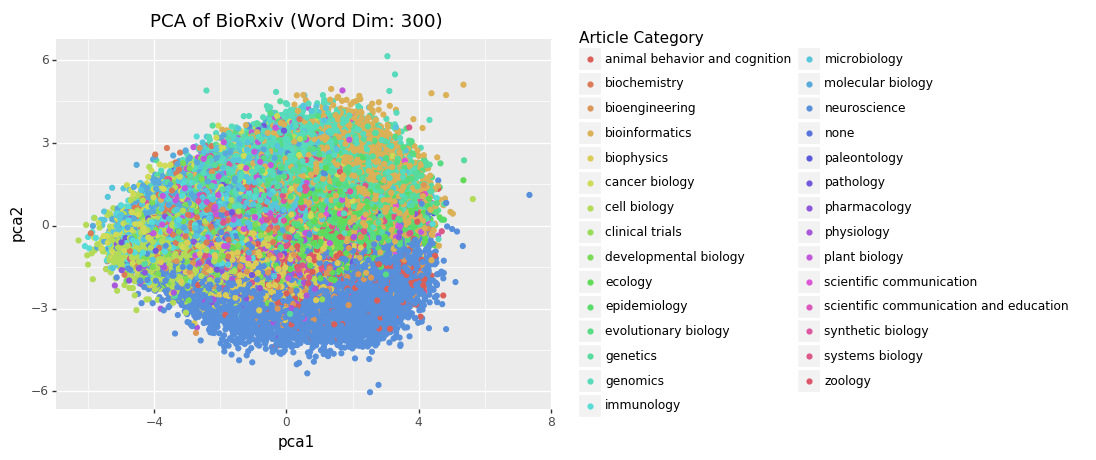

<ggplot: (8777576571561)>


In [10]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca01_v_pca02.png", dpi=500)
print(g)

Take note that pca2 clusters neruoscience papers on the negative axis while genomics papers are on the positive axis (up and down). PCA 1 places papers that are more focused on quantitative biology on the right and molecular biology to the left. Hence why bioinforamtics papers are shifted more to the right and cell biology papers are shifted more to the left. This plot visually confirms the above finding.

### PCA1 vs PCA 3

In [11]:
display_clouds(
    'output/word_pca_similarity/figures/pca_01_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_03_cossim_word_cloud.png'
)

,


These word clouds depict the following concepts: quantitative biology vs molecular biology (left) and disease vs sequencing (right)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca1_v_pca3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


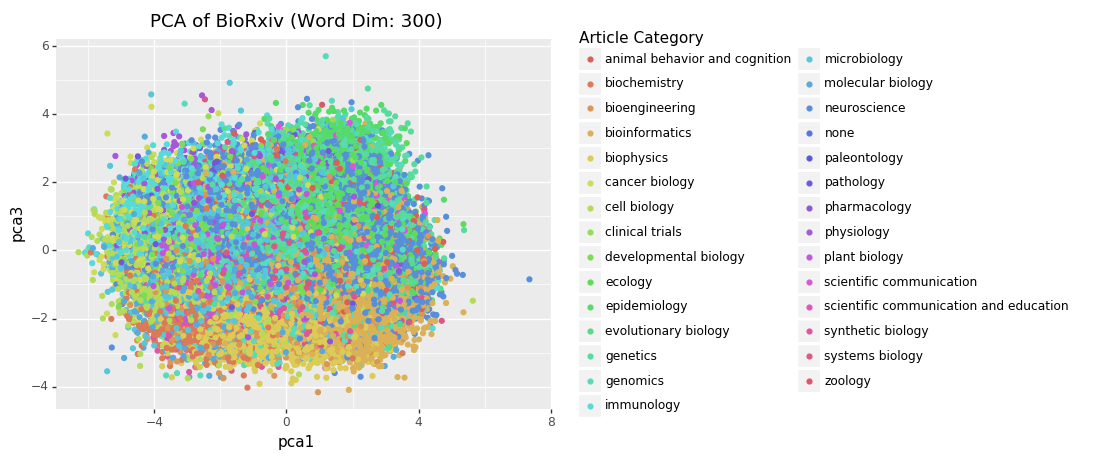

<ggplot: (8777572903488)>


In [12]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca1", y="pca3", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca01_v_pca03.png", dpi=500)
print(g)

Take note that pca3 clusters sequencing based papers on the negative axis (down) while disease papers are on the positive axis (up). When plotted against PCA1 it looks like epidemiology papers dominate the top right quadrant, while bottom right quadrant contains bioinformatics papers. This makes sense as many bioinformatic papers consist of some sort of sequencing technologies, while epidemiology is focused on measuring disease and its progression. Both take quantitative views, which is why they are on the positive size of PCA1.

### PCA2 vs PCA3

In [13]:
display_clouds(
    'output/word_pca_similarity/figures/pca_02_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_03_cossim_word_cloud.png'
)

,


These word clouds depict the following concepts: neuroscience to genomics (left) and disease vs sequencing (right)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca02_v_pca03.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


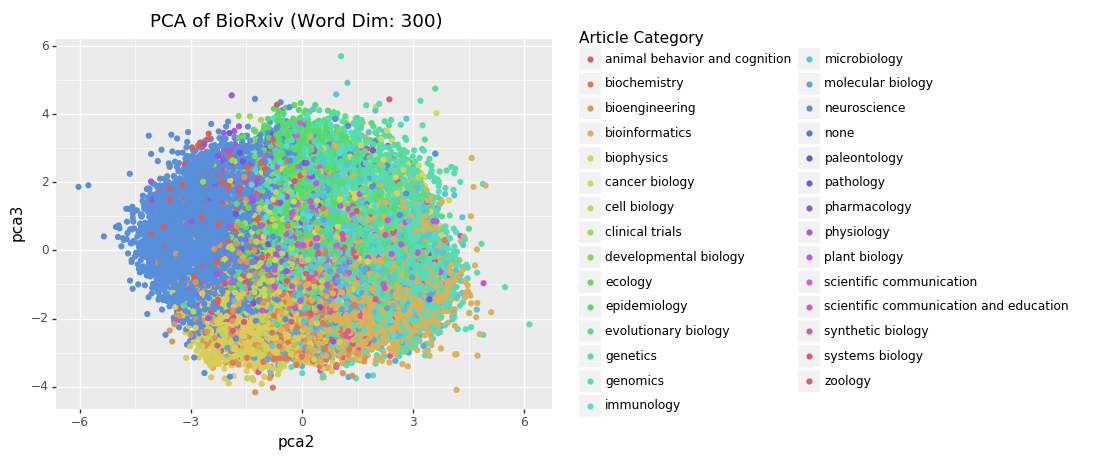

<ggplot: (8777577096547)>


In [14]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca2", y="pca3", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca02_v_pca03.png", dpi=500)
print(g)

Note that bottom right quadrant comprises of mainly bioinformatics papers, which makes sense given that quadrant represents sequencing and genomics related papers (hence bioinformatics). The bottom left quadrant contains papers that have sequencing terms mentioned, but are more related to neuroscience than genomics (thats what forms the biophysics clusters). The top left are papers that relate to neuroscience and focused on disease while top right are genomics related papers that focus on disease.

### PCA3 vs PCA5 

In [15]:
display_clouds(
    'output/word_pca_similarity/figures/pca_03_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_05_cossim_word_cloud.png'
)

,


These word clouds depict the following concepts: sequencing vs disease (left) and RNA-seq vs evolutionary biology (right)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca03_v_pca05.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


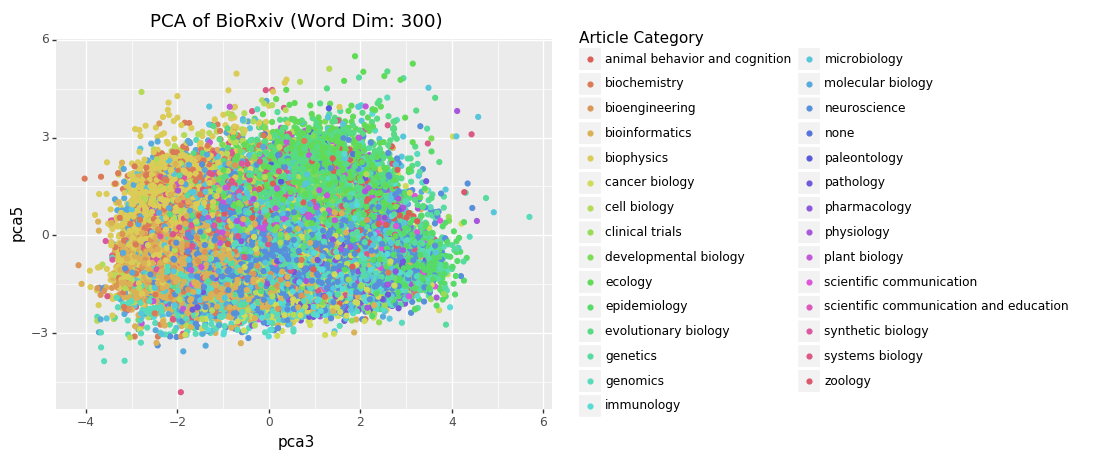

<ggplot: (-9223363259277720516)>


In [16]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca3", y="pca5", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca03_v_pca05.png", dpi=500)
print(g)

In [17]:
(
    pca_df[["pca3", "pca5", "category", "doi"]]
    .query("pca3 > 0 & pca5 > 0")
    .category
    .value_counts()
    .head(10)
)

evolutionary biology             2975
ecology                          2329
neuroscience                     1850
microbiology                     1421
genetics                         1111
genomics                         1058
plant biology                    1036
developmental biology             879
cell biology                      486
animal behavior and cognition     455
Name: category, dtype: int64

In [18]:
(
    pca_df[["pca3", "pca5", "category", "doi"]]
    .query("pca3 < 0 & pca5 < 0")
    .category
    .value_counts()
    .head(10)
)

bioinformatics       4287
neuroscience         3303
genomics             1603
microbiology         1399
cell biology          948
bioengineering        908
molecular biology     722
biophysics            663
biochemistry          591
genetics              585
Name: category, dtype: int64

Looking at the top-right quadrant and bottom-left quadrant, the top 10 categories provide evidence for the concepts mentioned above. Since PCA5 contains RNA-seq concepts on the negative sdes and PCA3 has sequencing as well on its negative axis, one would expect the top category for the bottom-left quadrant be bioinformatics related. Likewise the top right should be focused on evolutionary biology and possibly disease.

### PCA1 vs PCA4

In [19]:
display_clouds(
    'output/word_pca_similarity/figures/pca_01_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_04_cossim_word_cloud.png'
)

,


These word cloud produces the following concepts: qunatitative biology vs molecular biology (left) and marine biology vs cell biology (right).

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca01_v_pca04.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


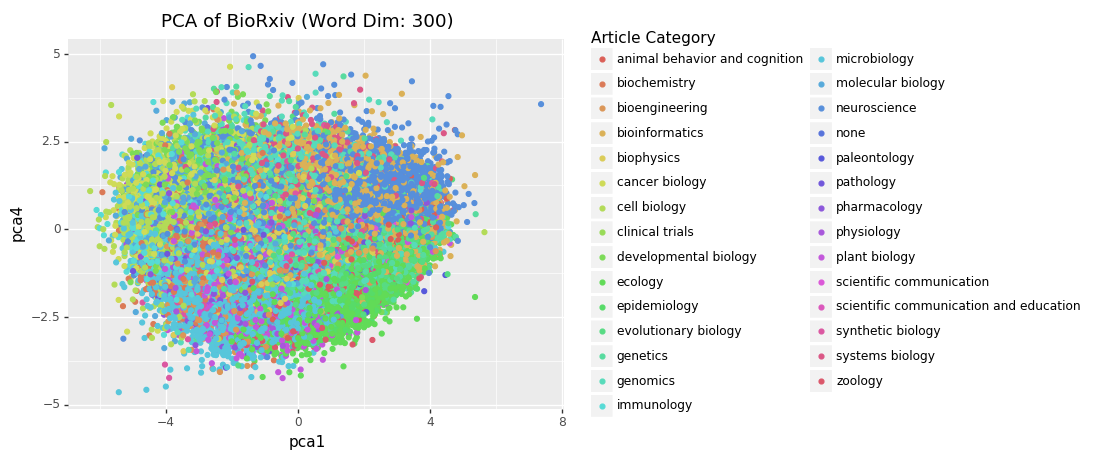

<ggplot: (-9223363259277469643)>


In [20]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca1", y="pca4", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca01_v_pca04.png", dpi=500)
print(g)

In [21]:
(
    pca_df
    [["pca1", "pca4", "category", "doi"]]
    .query("pca1 < -2 & pca4 > 0")
    .category
    .value_counts()
    .head(10)
)

cell biology             2039
developmental biology    1366
neuroscience             1237
cancer biology           1122
molecular biology         978
immunology                757
biochemistry              561
microbiology              478
genetics                  475
plant biology             299
Name: category, dtype: int64

In [22]:
(
    pca_df
    [["pca1", "pca4", "category", "doi"]]
    .query("pca1 < 0 & pca4 < 0")
    .category
    .value_counts()
    .head(10)
)

microbiology            4010
biochemistry            1190
biophysics              1133
neuroscience            1104
plant biology           1100
cell biology            1059
molecular biology        766
bioengineering           748
immunology               696
evolutionary biology     614
Name: category, dtype: int64

Looking on the left size of PCA1 (negative), it looks like the top quadrant contains mainly cell biology papers and variants of cell biology. The bottom quadrant contains papers that are related to microbiology; Fun anecdote is that I super convinced that PCA4 was marine biology, but upon closer inspection turns out I was wrong it is microbio.

# Non-straightforward PCs

This section of the notebook aims to take a look at PCs that are not as straightforward as the ones above.

## PCA1 vs PCA6

In [23]:
display_clouds(
    'output/word_pca_similarity/figures/pca_01_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_06_cossim_word_cloud.png'
)

,


The right word cloud appears to represent mathematics vs scientific communication or at least popular buzz words scientist used to promote their research. The next few cells will look more into it.

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca01_v_pca06.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


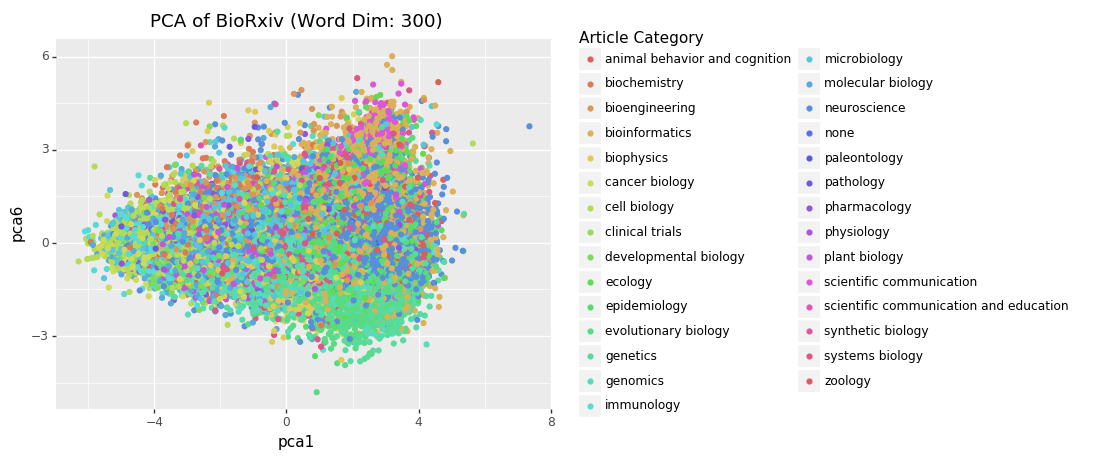

<ggplot: (8777576386287)>


In [24]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca1", y="pca6", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca01_v_pca06.png", dpi=500)
print(g)

In [25]:
(
    pca_df[["pca1", "pca6", "category", "doi"]]
    .drop_duplicates("doi")
    .query("pca1 > 0 & pca6 > 3")
    .category
    .value_counts()
    .head(10)
)

bioinformatics              257
scientific communication    117
neuroscience                 41
ecology                      22
genomics                     20
systems biology              17
epidemiology                 16
bioengineering               15
biophysics                   13
microbiology                 12
Name: category, dtype: int64

In [26]:
(
    pca_df[["pca1", "pca6", "category", "doi"]]
    .drop_duplicates("doi")
    .query("pca1 > 0 & pca6 < -1.5")
    .category
    .value_counts()
    .head(10)
)

evolutionary biology    821
genetics                504
genomics                318
bioinformatics          261
neuroscience            222
biophysics               92
systems biology          84
ecology                  75
cancer biology           49
epidemiology             38
Name: category, dtype: int64

Looking at the top categories for the top and bottom right quadrants it seems that the papers follow the patterns captures by the word clouds above; however the positive axis still remains difficult to judge without taking a look at the individual papers.

In [27]:
(
    pca_df[["pca1", "pca6", "category", "doi"]]
    .drop_duplicates("doi")
    .query("pca1 > 0 & pca6 > 3")
    .sort_values("pca6", ascending=False)
    .head(10)
)

,pca1,pca6,category,doi
69580,3.199558,6.017543,bioinformatics,10.1101/610741
61026,3.042379,5.740594,bioinformatics,10.1101/276485
46386,3.202682,5.573135,bioinformatics,10.1101/204495
50501,2.143476,5.311097,systems biology,10.1101/038117
26708,3.474341,5.191860,bioinformatics,10.1101/201186
28298,4.596815,5.181052,animal behavior and cognition,10.1101/377960
32096,3.475192,5.132834,scientific communication,10.1101/122424
1099,2.623749,5.104631,scientific communication,10.1101/518498
13210,0.453545,4.929136,bioengineering,10.1101/796516
36174,3.716908,4.917438,systems biology,10.1101/109207


## PCA2 vs PCA15

In [28]:
display_clouds(
    'output/word_pca_similarity/figures/pca_02_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_15_cossim_word_cloud.png'
)

,


The word cloud on the right seems to contain the following concepts: facial recognition and behavior vs neuron biochemistry.

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca02_v_pca15.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


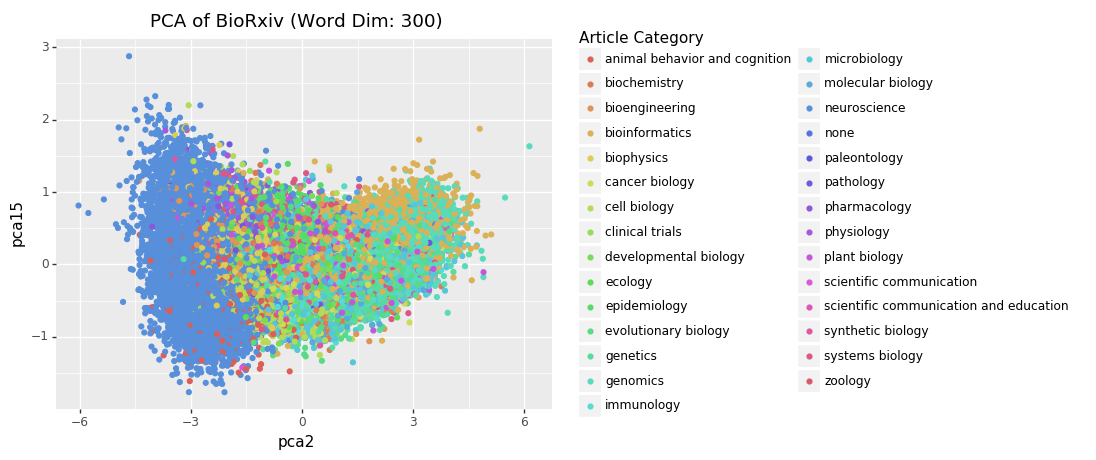

<ggplot: (8777572974649)>


In [29]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca2", y="pca15", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca02_v_pca15.png", dpi=500)
print(g)

This graph depicts diversity within the neuroscience field as some papers are about facial recognition (negative) and other papers are about biochemistry (positive).

In [30]:
(
    pca_df
    [["pca2", "pca15", "category", "document","doi"]]
    .sort_values(["pca15", "pca2"], ascending=[False, False])
    .head(10)
)

,pca2,pca15,category,document,doi
60030,-4.666621,2.874970,neuroscience,466300_v1.xml,10.1101/466300
23115,-3.959791,2.323217,neuroscience,053637_v1.xml,10.1101/053637
64844,-4.195080,2.276012,neuroscience,119859_v1.xml,10.1101/119859
21266,-3.595040,2.201443,neuroscience,075697_v1.xml,10.1101/075697
536,-3.057822,2.197123,cell biology,155093_v1.xml,10.1101/155093
44326,-2.741087,2.196218,neuroscience,072041_v1.xml,10.1101/072041
55856,-4.155904,2.195683,neuroscience,361014_v1.xml,10.1101/361014
38894,-4.087525,2.172397,neuroscience,282012_v2.xml,10.1101/282012
45319,-3.586306,2.147911,neuroscience,024653_v1.xml,10.1101/024653
55954,-3.616043,2.147108,neuroscience,566117_v2.xml,10.1101/566117


In [31]:
(
    pca_df
    [["pca2", "pca15", "category", "document","doi"]]
    .sort_values(["pca15", "pca2"], ascending=[False, False])
    .tail(10)
)

,pca2,pca15,category,document,doi
11101,-2.194532,-1.596621,neuroscience,186924_v1.xml,10.1101/186924
32356,-3.026858,-1.611846,animal behavior and cognition,701995_v1.xml,10.1101/701995
46931,-2.383721,-1.616902,neuroscience,338475_v2.xml,10.1101/338475
27633,-3.296298,-1.624607,neuroscience,740555_v2.xml,10.1101/740555
51284,-2.596866,-1.635717,neuroscience,058537_v3.xml,10.1101/058537
3673,-2.190250,-1.638188,neuroscience,141861_v1.xml,10.1101/141861
69651,-2.315590,-1.650163,neuroscience,194829_v1.xml,10.1101/194829
20795,-2.153772,-1.651122,neuroscience,533513_v2.xml,10.1101/533513
12323,-3.051240,-1.764098,neuroscience,206003_v1.xml,10.1101/206003
10527,-2.089817,-1.765300,neuroscience,293225_v1.xml,10.1101/293225


These papers confirm that the negative axis of PCA15 is facial recognition.

## PCA1 vs PCA8

In [32]:
display_clouds(
    'output/word_pca_similarity/figures/pca_02_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_08_cossim_word_cloud.png'
)

,


The wordcloud on the right seems to represent the following concept:  biochemistry vs developmental biology. Main evidence for this appears in the plot below.

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca02_v_pca08.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


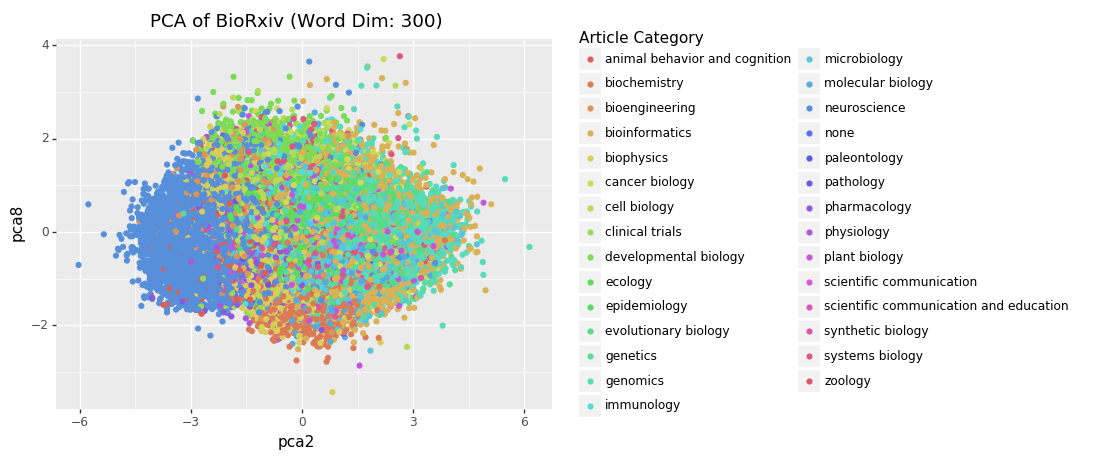

<ggplot: (8777577273271)>


In [33]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca2", y="pca8", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca02_v_pca08.png", dpi=500)
print(g)

In [34]:
(
    pca_df
    [["pca2", "pca8", "category", "doi"]]
    .query("pca2 > -2 & pca2 < 2 & pca8 < -1")
    .category
    .value_counts()
    .head(10)
)

biochemistry         1257
biophysics            795
microbiology          481
molecular biology     434
bioinformatics        353
neuroscience          298
genetics              283
epidemiology          178
cell biology          138
plant biology         120
Name: category, dtype: int64

In [35]:
(
    pca_df
    [["pca2", "pca8", "category", "doi"]]
    .query("pca2 > -2 & pca2 < 2 & pca8 > 1")
    .category
    .value_counts()
    .head(10)
)

developmental biology    964
cell biology             660
neuroscience             522
bioinformatics           404
cancer biology           308
evolutionary biology     307
immunology               260
bioengineering           210
genomics                 205
ecology                  201
Name: category, dtype: int64

Looking at the top left and bottom left quadrants the top categories are: biochemistry and developmental biology. Based on this confirmation I'd argue that pca8 covers both of these concepts.

## PCA3 VS PCA13

In [36]:
display_clouds(
    'output/word_pca_similarity/figures/pca_02_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_13_cossim_word_cloud.png'
)

,


Based on a quick google search the wordcloud on the right represents: viruses (immunology) vs model organisms.

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca02_v_pca13.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


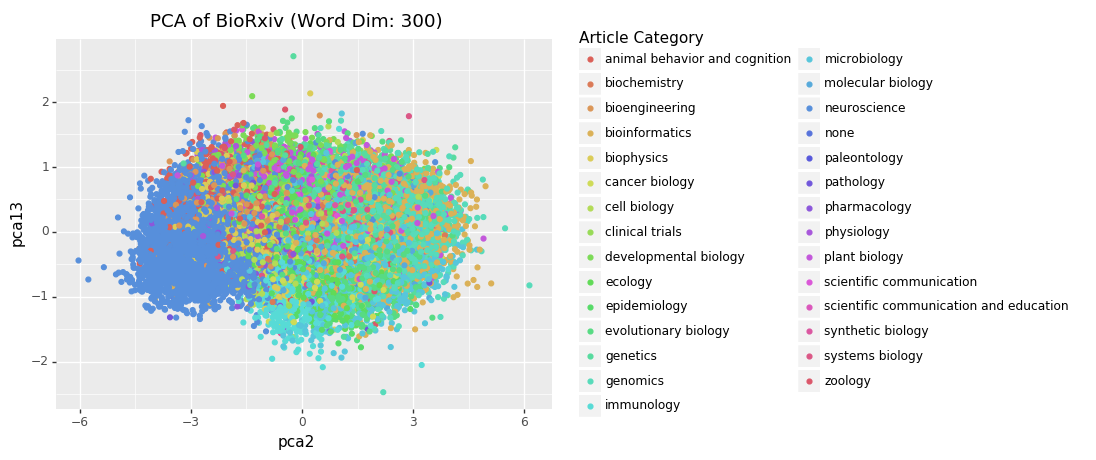

<ggplot: (8777577102151)>


In [37]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca2", y="pca13", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca02_v_pca13.png", dpi=500)
print(g)

In [38]:
(
    pca_df
    [["pca2", "pca13", "category", "doi"]]
    .sort_values("pca13", ascending=False)
    .head(10)
)

,pca2,pca13,category,doi
71014,-0.230158,2.705651,genetics,10.1101/837526
5721,0.223596,2.132478,biophysics,10.1101/771725
36808,-1.342941,2.090216,developmental biology,10.1101/180562
67917,-2.129618,1.939689,animal behavior and cognition,10.1101/801993
22127,-0.453975,1.883982,zoology,10.1101/572149
5235,1.073262,1.822232,microbiology,10.1101/689646
48412,0.480089,1.792276,bioengineering,10.1101/592931
39022,2.885687,1.781428,systems biology,10.1101/589036
46339,-0.275879,1.747573,evolutionary biology,10.1101/218834
59372,-3.063470,1.718986,neuroscience,10.1101/733733


In [39]:
(
    pca_df
    [["pca2", "pca13", "category", "doi"]]
    .sort_values("pca13", ascending=True)
    .head(10)
)

,pca2,pca13,category,doi
24614,2.194220,-2.473027,genomics,10.1101/521666
28531,0.561802,-2.087082,immunology,10.1101/459164
15608,3.230793,-2.054000,immunology,10.1101/457069
57194,-0.804293,-1.957388,immunology,10.1101/686170
64499,0.444289,-1.949410,immunology,10.1101/823328
25498,1.065835,-1.939880,microbiology,10.1101/817320
36154,0.209931,-1.880022,immunology,10.1101/565259
38206,0.855564,-1.870947,microbiology,10.1101/790642
44010,-0.150021,-1.855690,immunology,10.1101/537050
4017,0.512949,-1.846959,immunology,10.1101/743187


Looking at the extremes values along PCA13, the categories seem to confirm my suspicions.

## PCA17 vs PCA20

In [40]:
display_clouds(
    'output/word_pca_similarity/figures/pca_04_cossim_word_cloud.png',
    'output/word_pca_similarity/figures/pca_20_cossim_word_cloud.png'
)

,


PCA20 represents the following concepts: immunology and cancer biology.

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/pca_plots/pca4_v_pca20.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


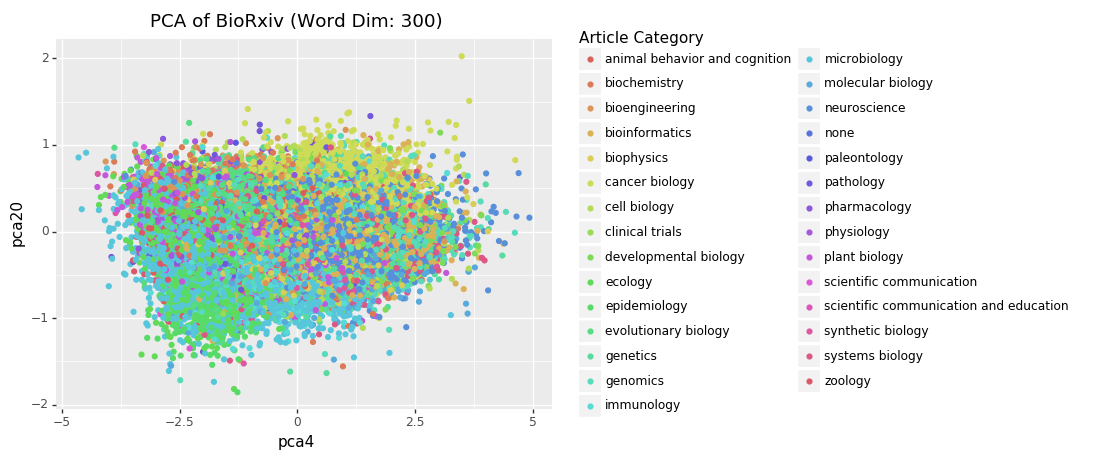

<ggplot: (-9223363259277639911)>


In [41]:
g = (
    p9.ggplot(pca_df)
    + p9.aes(x="pca4", y="pca20", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word Dim: 300)",
        color="Article Category"
    )
)
g.save("output/pca_plots/pca04_v_pca20.png", dpi=500)
print(g)

In [42]:
(
    pca_df
    [["pca4", "pca20", "category", "doi"]]
    .query("pca4 < 0 & pca20 < 0")
    .category
    .value_counts()
    .head(10)
)

microbiology            3668
epidemiology            1353
ecology                 1131
neuroscience            1106
biophysics               950
genetics                 869
evolutionary biology     862
bioinformatics           763
plant biology            745
genomics                 683
Name: category, dtype: int64

In [43]:
(
    pca_df
    [["pca4", "pca20", "category", "doi"]]
    .query("pca4 > 0 & pca20 > 0")
    .category
    .value_counts()
    .head(10)
)

neuroscience             4608
bioinformatics           2672
cancer biology           1807
genomics                 1312
cell biology             1034
developmental biology     804
immunology                701
genetics                  684
evolutionary biology      652
biophysics                633
Name: category, dtype: int64